In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, AveragePooling2D, Input
from keras.optimizers import Adam
from statistics import mean
import tensorflow as tf
from keras.models import model_from_json
import numpy as np
from matplotlib import pyplot as plt


In [2]:
train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                    #rotation_range=30,
                                    #shear_range=0.3,
                                    #zoom_range=0.3,
                                    #horizontal_flip=True,
                                    #fill_mode='nearest'
                                   )
test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, 
                                    #rotation_range=30,
                                    #shear_range=0.3,
                                    #zoom_range=0.3,
                                    #horizontal_flip=True,
                                    #fill_mode='nearest'
                                    )

train_generator = train_data_generator.flow_from_directory(
    'data/train',
    target_size=(48, 48),
    batch_size=32,
    color_mode="grayscale",
    class_mode='categorical')

validation_generator = test_data_generator.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=32,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [3]:
#Initialize our facial emotion recognition model
FER_CNN = Sequential()

#Add the input dimensions
FER_CNN.add(Input(shape=(48,48,1)))

#Add two convolutional layers with kernel size 5, and relu activation
FER_CNN.add(Conv2D(32, kernel_size=(5, 5), activation='relu'))
FER_CNN.add(Conv2D(64, kernel_size=(5, 5), activation='relu'))
#Add a max pooling layer to reduce noise, with kernel 2
FER_CNN.add(MaxPooling2D(pool_size=(2, 2)))
#Add a dropout layer with rate 0.25 to reduce risk of overfitting
FER_CNN.add(Dropout(0.25))
 
#Two convolutional layers with kernel size 5 and activation relu
#followed by two maxpooling layers with kernel 2 (to reduce noise)
FER_CNN.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
FER_CNN.add(MaxPooling2D(pool_size=(2, 2)))
FER_CNN.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
FER_CNN.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout layer to reduce risk of overfitting, rate of 0.25
FER_CNN.add(Dropout(0.25))
 
#Final linear layers with final dropout layer with rate 0.25
FER_CNN.add(Flatten())
#FER_CNN.add(Dense(1024, activation='relu'))
FER_CNN.add(Dropout(0.25))
#Softmax function to give probabilistic distribution to each class
FER_CNN.add(Dense(7, activation='softmax'))
 
#See our model architecture:
FER_CNN.summary()
 
 
learning_rate = 0.001

#Choose our optimizer
optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
FER_CNN.compile(loss='categorical_crossentropy', optimizer=optimizer, 
                      metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 44, 44, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 40, 40, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 670,343 (2.56 MB)

 Trainable params: 670,343 (2.56 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
emotion_model_info = FER_CNN.fit(
    train_generator,
    steps_per_epoch=28709 // 32,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=7178 // 32
)

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 151s 167ms/step - accuracy: 0.2576 - loss: 1.8203 - val_accuracy: 0.4347 - val_loss: 1.4975
Epoch 2/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 57us/step - accuracy: 0.2812 - loss: 1.4739 - val_accuracy: 0.4000 - val_loss: 1.5468
Epoch 3/50


2024-06-25 17:10:43.298562: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-06-25 17:10:43.331790: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 144s 160ms/step - accuracy: 0.4371 - loss: 1.4734 - val_accuracy: 0.5080 - val_loss: 1.3104
Epoch 4/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.3750 - loss: 1.7168 - val_accuracy: 0.7000 - val_loss: 1.1447
Epoch 5/50


2024-06-25 17:13:07.143642: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:13:07.159016: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 139s 155ms/step - accuracy: 0.5043 - loss: 1.2960 - val_accuracy: 0.5406 - val_loss: 1.2089
Epoch 6/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.6250 - loss: 1.1113 - val_accuracy: 0.6000 - val_loss: 1.1052
Epoch 7/50


2024-06-25 17:15:26.545688: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:15:26.562176: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 143s 160ms/step - accuracy: 0.5422 - loss: 1.2234 - val_accuracy: 0.5582 - val_loss: 1.1688
Epoch 8/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - accuracy: 0.6562 - loss: 1.2166 - val_accuracy: 0.5000 - val_loss: 0.9635
Epoch 9/50


2024-06-25 17:17:50.021188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:17:50.050508: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 153s 171ms/step - accuracy: 0.5669 - loss: 1.1504 - val_accuracy: 0.5601 - val_loss: 1.1899
Epoch 10/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.5312 - loss: 1.0858 - val_accuracy: 0.6000 - val_loss: 1.0376
Epoch 11/50


2024-06-25 17:20:23.589376: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:20:23.619728: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 128s 143ms/step - accuracy: 0.5845 - loss: 1.1138 - val_accuracy: 0.5787 - val_loss: 1.1289
Epoch 12/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.5625 - loss: 0.9973 - val_accuracy: 0.5000 - val_loss: 1.0940
Epoch 13/50


2024-06-25 17:22:31.866856: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:22:31.884555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 133s 148ms/step - accuracy: 0.5992 - loss: 1.0780 - val_accuracy: 0.5663 - val_loss: 1.1512
Epoch 14/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.6875 - loss: 0.9982 - val_accuracy: 0.4000 - val_loss: 1.7379
Epoch 15/50


2024-06-25 17:24:45.128898: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:24:45.154277: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 128s 143ms/step - accuracy: 0.6068 - loss: 1.0581 - val_accuracy: 0.5844 - val_loss: 1.1136
Epoch 16/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 28us/step - accuracy: 0.6875 - loss: 0.8782 - val_accuracy: 0.7000 - val_loss: 0.6075
Epoch 17/50


2024-06-25 17:26:53.650582: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:26:53.666404: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 127s 141ms/step - accuracy: 0.6219 - loss: 1.0190 - val_accuracy: 0.5861 - val_loss: 1.1215
Epoch 18/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.6875 - loss: 0.9168 - val_accuracy: 0.8000 - val_loss: 0.7214
Epoch 19/50


2024-06-25 17:29:00.515461: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:29:00.541754: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 121s 135ms/step - accuracy: 0.6294 - loss: 1.0037 - val_accuracy: 0.5912 - val_loss: 1.1119
Epoch 20/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.6875 - loss: 0.8514 - val_accuracy: 0.6000 - val_loss: 1.2087
Epoch 21/50


2024-06-25 17:31:02.150315: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:31:02.167252: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 138s 154ms/step - accuracy: 0.6346 - loss: 0.9878 - val_accuracy: 0.5838 - val_loss: 1.1226
Epoch 22/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 35us/step - accuracy: 0.6875 - loss: 0.9126 - val_accuracy: 0.4000 - val_loss: 1.0927
Epoch 23/50


2024-06-25 17:33:20.522224: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:33:20.546231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 133s 148ms/step - accuracy: 0.6393 - loss: 0.9826 - val_accuracy: 0.5903 - val_loss: 1.1182
Epoch 24/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 35us/step - accuracy: 0.7500 - loss: 0.8517 - val_accuracy: 0.7000 - val_loss: 1.1693
Epoch 25/50


2024-06-25 17:35:33.705495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:35:33.729756: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 122s 136ms/step - accuracy: 0.6385 - loss: 0.9763 - val_accuracy: 0.5900 - val_loss: 1.1087
Epoch 26/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.6875 - loss: 0.9060 - val_accuracy: 0.7000 - val_loss: 1.0662
Epoch 27/50


2024-06-25 17:37:36.011152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:37:36.027231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 122s 136ms/step - accuracy: 0.6508 - loss: 0.9630 - val_accuracy: 0.5730 - val_loss: 1.1661
Epoch 28/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.6562 - loss: 0.9574 - val_accuracy: 0.4000 - val_loss: 1.2875
Epoch 29/50


2024-06-25 17:39:38.313225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:39:38.327755: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 123s 137ms/step - accuracy: 0.6487 - loss: 0.9583 - val_accuracy: 0.5956 - val_loss: 1.1120
Epoch 30/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.5000 - loss: 1.2410 - val_accuracy: 0.7000 - val_loss: 1.6899
Epoch 31/50


2024-06-25 17:41:41.668530: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:41:41.684568: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 124s 139ms/step - accuracy: 0.6457 - loss: 0.9562 - val_accuracy: 0.5776 - val_loss: 1.1417
Epoch 32/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.5625 - loss: 1.1671 - val_accuracy: 0.5000 - val_loss: 1.1339
Epoch 33/50


2024-06-25 17:43:46.167548: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:43:46.184469: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 128s 143ms/step - accuracy: 0.6612 - loss: 0.9413 - val_accuracy: 0.5794 - val_loss: 1.1561
Epoch 34/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step - accuracy: 0.5312 - loss: 1.0987 - val_accuracy: 0.9000 - val_loss: 0.7851
Epoch 35/50


2024-06-25 17:45:54.674482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:45:54.696807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 126s 140ms/step - accuracy: 0.6584 - loss: 0.9391 - val_accuracy: 0.5777 - val_loss: 1.1408
Epoch 36/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.7188 - loss: 0.7043 - val_accuracy: 0.9000 - val_loss: 0.7508
Epoch 37/50


2024-06-25 17:48:00.664085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:48:00.679440: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 127s 141ms/step - accuracy: 0.6557 - loss: 0.9569 - val_accuracy: 0.5791 - val_loss: 1.2031
Epoch 38/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.6250 - loss: 0.7930 - val_accuracy: 0.4000 - val_loss: 1.2935
Epoch 39/50


2024-06-25 17:50:07.650793: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:50:07.666262: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 127s 141ms/step - accuracy: 0.6571 - loss: 0.9487 - val_accuracy: 0.5530 - val_loss: 1.2089
Epoch 40/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step - accuracy: 0.6562 - loss: 1.2555 - val_accuracy: 0.5000 - val_loss: 1.0454
Epoch 41/50


2024-06-25 17:52:14.585395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:52:14.609863: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 128s 142ms/step - accuracy: 0.6645 - loss: 0.9310 - val_accuracy: 0.5954 - val_loss: 1.1289
Epoch 42/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.5938 - loss: 1.0262 - val_accuracy: 0.7000 - val_loss: 1.2559
Epoch 43/50


2024-06-25 17:54:22.612643: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:54:22.637798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 127s 142ms/step - accuracy: 0.6620 - loss: 0.9402 - val_accuracy: 0.5794 - val_loss: 1.1653
Epoch 44/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 35us/step - accuracy: 0.5625 - loss: 1.1174 - val_accuracy: 0.4000 - val_loss: 1.8728
Epoch 45/50


2024-06-25 17:56:30.033622: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:56:30.057368: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 126s 141ms/step - accuracy: 0.6568 - loss: 0.9445 - val_accuracy: 0.5710 - val_loss: 1.1634
Epoch 46/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.6250 - loss: 0.8227 - val_accuracy: 0.8000 - val_loss: 0.7764
Epoch 47/50


2024-06-25 17:58:36.308751: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 17:58:36.325401: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 127s 141ms/step - accuracy: 0.6672 - loss: 0.9388 - val_accuracy: 0.5852 - val_loss: 1.3329
Epoch 48/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.6250 - loss: 1.4450 - val_accuracy: 0.5000 - val_loss: 0.9464
Epoch 49/50


2024-06-25 18:00:43.058696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 18:00:43.075537: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


897/897 ━━━━━━━━━━━━━━━━━━━━ 126s 140ms/step - accuracy: 0.6570 - loss: 0.9553 - val_accuracy: 0.5707 - val_loss: 1.1676
Epoch 50/50
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 26us/step - accuracy: 0.7812 - loss: 0.8632 - val_accuracy: 0.6000 - val_loss: 1.1141


2024-06-25 18:02:49.005908: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-25 18:02:49.020875: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [5]:
FER_CNN.evaluate(validation_generator)
train_accuracy = emotion_model_info.history['accuracy']
validation_accuracy = emotion_model_info.history['val_accuracy']
loss = emotion_model_info.history['loss']

max_val_accuracy = max(validation_accuracy)
print("Test Accuracy: ", max_val_accuracy)
print("Training Accuracy: ", max(train_accuracy))

overall_accuracies = []
for i in range(len(train_accuracy)):
    overall_accuracies.append((train_accuracy[i]*28709 + validation_accuracy[i]*7178) / (28709+7178))
print("Overall Accuracy: ", max(overall_accuracies))

225/225 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5802 - loss: 1.1824
Test Accuracy:  0.8999999761581421
Training Accuracy:  0.78125
Overall Accuracy:  0.7550030255764801


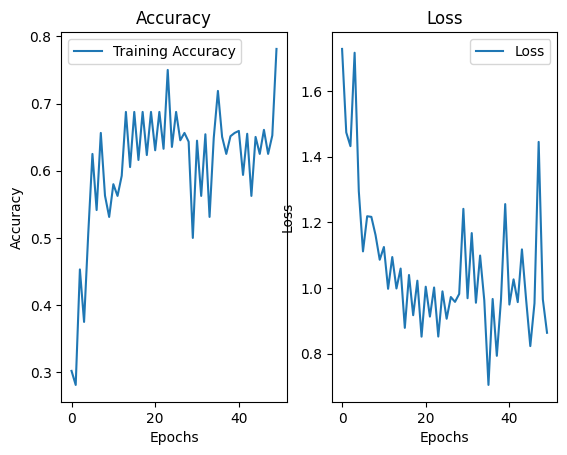

In [6]:
# Accuracy graph
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
 
# loss graph
plt.subplot(1, 2, 2)
plt.plot(loss, label='Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
 
plt.show()